In [3]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import lmfit
from scipy import stats
#import ROOT as r
from scipy import optimize as opt

In [4]:
#Lets do some integrals
p50=stats.norm.cdf(0)
p1=stats.norm.cdf(1)
p2=stats.norm.cdf(2)
p3=stats.norm.cdf(3)
p5=stats.norm.cdf(5)
pM1=stats.norm.cdf(-1)
pM2=stats.norm.cdf(-2)
pM3=stats.norm.cdf(-3)
pM5=stats.norm.cdf(-5)
print(p50,p1,p2,p3,pM1,pM2,pM3)

#Whats the probability of things fluctuation more that 1\sigma
print(p1-pM1,"within 1 standard deviations")
print(p2-pM2,"within 2 standard deviations")
print(p3-pM3,"within 3 standard deviations")
print(p5-pM5,"within 5 standard deviations")

#Sometimes we only consider 1-sided p-values
print((1.-p1),"to fluctuate above 1 standard deviation")
print((1.-p3),"to fluctuate above 3 standard deviation")
print((1.-p5),"to fluctuate above 5 standard deviation")

0.5 0.8413447460685429 0.9772498680518208 0.9986501019683699 0.15865525393145707 0.022750131948179195 0.0013498980316300933
0.6826894921370859 within 1 standard deviations
0.9544997361036416 within 2 standard deviations
0.9973002039367398 within 3 standard deviations
0.9999994266968562 within 5 standard deviations
0.15865525393145707 to fluctuate above 1 standard deviation
0.0013498980316301035 to fluctuate above 3 standard deviation
2.866515719235352e-07 to fluctuate above 5 standard deviation


In [11]:
#stats.norm.cdf(1)
a=stats.norm.pdf(1)
b=stats.norm.ppf(1-0.158)
print(a,b)

0.24197072451914337 1.0027116650265493


two tail values: 19.02276779864163 2.7003894999803584
one tail values: 16.918977604620448 3.3251128430668158


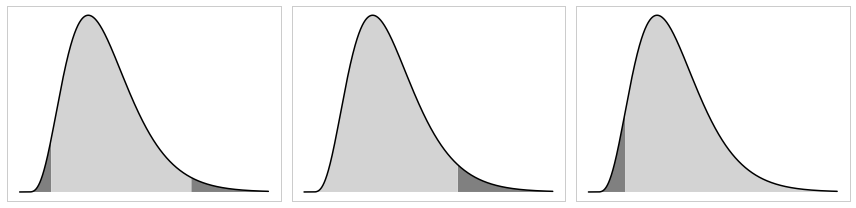

In [5]:
#code stolen from here: https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
#Note this needs to be python3
df = 9
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)

# two-tailed
#Note we will use this cool function percent poitn function(ppf), which inverts the cdf 
two_right_tail = stats.chi2.ppf(1 - 0.025, df)
two_left_tail = stats.chi2.ppf(1 - 0.975, df)
print("two tail values:",two_right_tail,two_left_tail)

# one tailed
one_right_tail = stats.chi2.ppf(1 - 0.05, df)
one_left_tail = stats.chi2.ppf(1 - 0.95, df)
print("one tail values:",one_right_tail,one_left_tail)

plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax in axes:
    ax.plot(x, y, c='black')
    ax.grid(False)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

axes[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_left_tail) & (np.array(x) < two_right_tail), facecolor='lightgrey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
#axes[0].title('Two-tailed', fontsize=20)
#axes[0].text(14, 0.08, r'$H_0: \sigma^2 = \sigma_0^2$', fontsize=20)
#axes[0].text(14, 0.057, r'$H_a: \sigma^2 \neq \sigma_0^2$', fontsize=20)

axes[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) < one_right_tail), facecolor='lightgrey')
axes[1].fill_between(x, 0, y, where=(np.array(x) > one_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
#axes[1].title('Upper/right-tailed', fontsize=20)
#axes[1].text(14, 0.08, r'$H_0: \sigma^2 \leq \sigma_0^2$', fontsize=20)
#axes[1].text(14, 0.057, r'$H_a: \sigma^2 > \sigma_0^2$', fontsize=20)

axes[2].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= one_left_tail), facecolor='grey')
axes[2].fill_between(x, 0, y, where=(np.array(x) > one_left_tail) & (np.array(x) <= max(x)), facecolor='lightgrey')
#axes[2].title('Lower/left-tailed', fontsize=20)
#axes[2].text(14, 0.08, r'$H_0: \sigma^2 \geq \sigma_0^2$', fontsize=20)
#axes[2].text(14, 0.057, r'$H_a: \sigma^2 < \sigma_0^2$', fontsize=20)

fig.tight_layout()

9.74221259704001 4.337861442608816


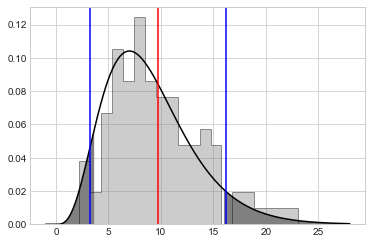

0.21963357653533194 30.518017211242196


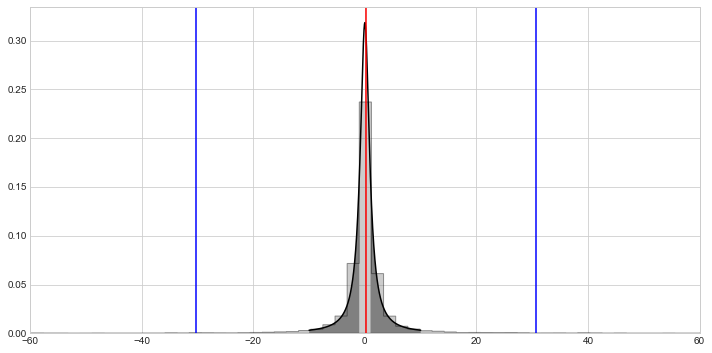

In [16]:
#Lets compute the mean and RMS of a sample from this distribution
df=9
y_chi2 = stats.chi2.rvs(size=100,df=df) 
print(y_chi2.mean(),y_chi2.std())
z=1.5
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)
two_right_tail = stats.chi2.ppf(1 - stats.norm.cdf(-z), df)
two_left_tail = stats.chi2.ppf(1 - stats.norm.cdf(z), df)

plt.style.use('seaborn-whitegrid')
plt.plot(x, y, c='black')
plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
plt.hist(y_chi2, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=20)

plt.axvline(y_chi2.mean(), c='red')
plt.axvline(y_chi2.mean()+y_chi2.std()*z, c='blue')
plt.axvline(y_chi2.mean()-y_chi2.std()*z, c='blue')
plt.show()
#Lets try this with an even crazier distribution
#https://en.wikipedia.org/wiki/Cauchy_distribution
fig, ax = plt.subplots(figsize=(12, 6))
plt.xlim([-60, 60])
y_cauchy = stats.cauchy.rvs(size=10000)
print(y_cauchy.mean(),y_cauchy.std())

z=1.0
x = np.linspace(-10, 10, 1000)
y = stats.cauchy.pdf(x, loc=0, scale=1)
two_right_tail = stats.cauchy.ppf(1 - stats.cauchy.cdf(-z))
two_left_tail = stats.cauchy.ppf(1 - stats.cauchy.cdf(z))

plt.plot(x, y, c='black')
plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
plt.hist(y_cauchy, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=1000)
plt.axvline(y_cauchy.mean(), c='red')
plt.axvline(y_cauchy.mean()+y_cauchy.std()*z, c='blue')
plt.axvline(y_cauchy.mean()-y_cauchy.std()*z, c='blue')
plt.show()

In [12]:
y_chi2 = stats.chi2.rvs(size=100,df=df) 
print(y_chi2)

[ 1.35435348  2.88566073  8.05073624  7.46974706 14.26306849  4.86764191
  6.37469899 10.89567614 10.20254366  5.23748757  5.48678199  6.4034316
 10.65568996  3.12981911  8.81216995 22.07638596  6.32746604  4.15602012
 15.06619557  8.14080454 11.16189704 10.05560561  9.22508317  6.95732976
  3.63937962  6.44186416  3.53945123 14.06065714  4.75305178  3.32822776
  3.11968194  6.1783916   4.80489437  7.85681769 10.4103776   4.50632003
 14.33696345  7.88821356  3.81269104  1.66815014  5.33043138  7.16256045
  8.44186935  8.5013473   4.33555133  7.88018304 14.14958872  7.23823483
  8.19482381 13.34740236  9.07438236 17.19584591 12.96966831  5.42669501
 14.35257266  9.11107258 10.11687672 12.39931067 25.58980273  6.0901599
  6.45779136  1.91940363  2.3835027   7.35647231  4.40324142  5.61450657
 17.43098166 11.50875675 10.10938469 10.2080742  10.99493815  9.90608038
 10.73288288 12.19603815  9.81158143 12.04749882  9.80821806  6.01073971
 11.32741797 19.61992335  7.66187547  7.95638364  8.3

normal mean: -0.003112273611802674
normal var: 0.9991698243634127
normal skew: 0.0020262893414770646
normal kurtosis: 2.9938861684084705
chi2 df 10 mean: 10.030008762171104
chi2 df 10 var: 20.033704927941894
chi2 df 10 skew: 80.50109681394795
chi2 df 10 kurtosis: 1687.0843436043199
cauchy mean: 0.4861927644682414
cauchy var: 24347.346837137407
cauchy skew: 450128878.11476773
cauchy kurtosis: 12255612205463.875


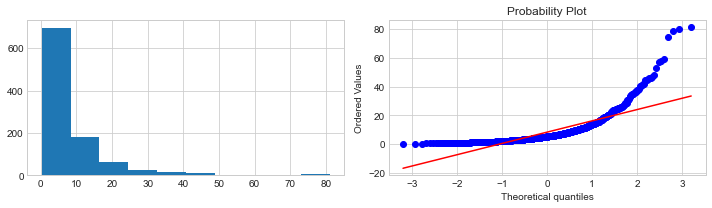

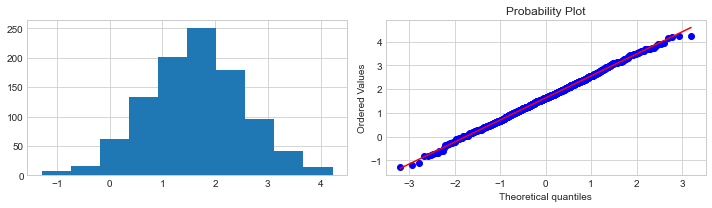

In [17]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    if k == 1:
        return X.mean()
    return raw_moment(X=X, k=k, c=X.mean())

def print_moments(X,label):
    print(label+" mean:",central_moment(X,1))
    print(label+" var:" ,central_moment(X,2))
    print(label+" skew:",central_moment(X,3))
    print(label+" kurtosis:",central_moment(X,4))

N=100000
y_norm = stats.norm.rvs(size=N)
print_moments(y_norm,"normal")

df=10
y_chi2 = stats.chi2.rvs(size=N,df=df)
print_moments(y_chi2,"chi2 df "+str(df))

y_cauchy = stats.cauchy.rvs(size=N)
print_moments(y_cauchy,"cauchy")

#Lastly, we should mention that there are a lot of powerful tools to use the cdf of a distribtuion to warp 
#the x-axis so that we can make distribtuions appear gaussian. 
#One method to do this is the box-cox
# generate non-normal sample
x = stats.lognorm.rvs(s=1, loc=0, scale=5, size=1000, random_state=4)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# box-cox transform
xt, lmbda = stats.boxcox(x)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

Pi (4*area): 3.1588 +/- 0.031588


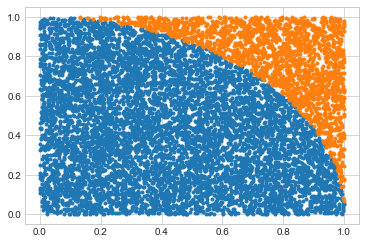

     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663
     fun: 12.499898490238554
    nfev: 14
     nit: 10
 success: True
       x: 0.6099371784012563


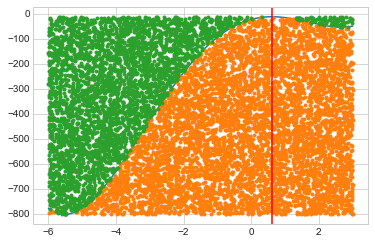

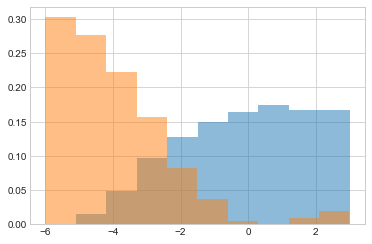

In [19]:
#First lets just compute the area of a quarter circle with radius 1
def quarterarea(iN):
    area=0
    lXin = np.array([])
    lYin = np.array([])
    lXout = np.array([])
    lYout = np.array([])
    for i0 in range(iN):
        pX = np.random.uniform(0,1)
        pY = np.random.uniform(0,1)
        if math.sqrt(pX**2+pY**2) < 1:
            lXin = np.append(lXin,pX)
            lYin = np.append(lYin,pY)
            area += 1
        else:
            lXout = np.append(lXout,pX)
            lYout = np.append(lYout,pY)
    return (float(area)/float(iN)),lXin,lYin,lXout,lYout
lN=10000
a,lXin,lYin,lXout,lYout=quarterarea(lN)
print("Pi (4*area):",a*4,"+/-",4*a/math.sqrt(lN)) #gotta put an uncertainty
plt.plot(lXin,lYin,marker='.',linestyle = 'None')
plt.plot(lXout,lYout,marker='.',linestyle = 'None')
plt.show()

#Now lets consider integrating some random function
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

def fneg(x):
    return -1*(x**4 + 3*(x-2)**3 - 15*(x)**2 + 1)

#First thing is to define a range
xmin=-6
xmax=3
x = np.linspace(xmin, xmax, 100)
sol=opt.minimize_scalar(f,bounds=(xmin, xmax), method='Brent')
print(sol)
ymin=sol.fun
sol=opt.minimize_scalar(fneg,bounds=(xmin, xmax), method='Brent')
print(sol)
ymax=-1*sol.fun
lXin = np.array([])
lYin = np.array([])
lXout = np.array([])
lYout = np.array([])
for i0 in range(lN):
    pX = abs(xmax-xmin)*np.random.uniform(0,1)+xmin
    pY = abs(ymax-ymin)*np.random.uniform(0,1)+ymin
    pYMin = f(pX)
    if pY < pYMin:
        lXin = np.append(lXin,pX)
        lYin = np.append(lYin,pY)
    else:
        lXout = np.append(lXout,pX)
        lYout = np.append(lYout,pY)

plt.plot(x, f(x));
plt.plot(lXin,lYin,marker='.',linestyle = 'None')
plt.plot(lXout,lYout,marker='.',linestyle = 'None')
plt.axvline(sol.x, c='red')
plt.show()
plt.hist(lXin,alpha=0.5,density=True)
plt.hist(lXout,alpha=0.5,density=True)
plt.show()

In [21]:
#Lets try to understand how good the fits we made in last class are, lets load the supernova data again
label='sn_z_mu_dmu_plow_union2.1.txt'
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        if float(row[1]) > 0.1:
            continue
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))


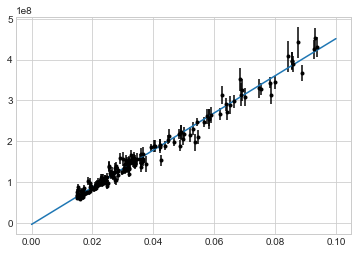

residuals mean: 0.0674380962700456
residuals var: 0.9619236126333892
residuals skew: 0.1553936844426706
residuals kurtosis: 3.274051707095445
normal distribution mean: -0.03344436989925524
normal distribution var: 0.9736578758148787
normal distribution skew: -0.11586299414399155
normal distribution kurtosis: 2.911665169240072


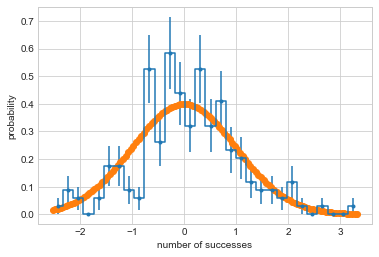

Total chi2: 169.1325141558355 NDOF 173
Normalized chi2: 0.977644590496159
Probability of chi2: 0.5688982622097782


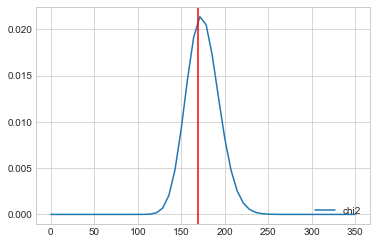

In [22]:
#Lets run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

var=variance(redshift)
cov=covariance(redshift,distance)
slope=cov/var
const=distance.mean()-slope*redshift.mean()
xvals = np.linspace(0,0.1,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,slope,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.show()
#Now to compute the uncertainty
residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    residuals = np.append(residuals,pResid/distance_err[i0])
    #residuals = np.append(residuals,pResid**2)
#This time we are going to look at a histogram of the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
normalpoints=stats.norm.rvs(0,1,1000)
#First lets look at the moments 
print_moments(residuals,"residuals")
print_moments(normalpoints,"normal distribution")

#Now lets plot it
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now lets look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Lets plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

In [23]:
redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))

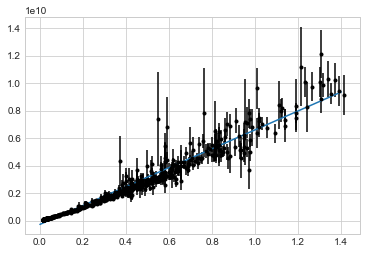

residuals mean: -5.4690139399836575
residuals var: 134.2507160558813
residuals skew: -2673.0893464472424
residuals kurtosis: 92943.88421254256
normal distribution mean: -0.00786423123199163
normal distribution var: 0.9128325025865534
normal distribution skew: -0.08772223909354074
normal distribution kurtosis: 2.4274933430767622


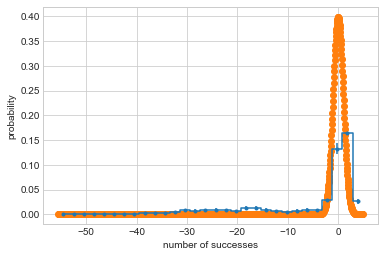

Total chi2: 95213.28112833778 NDOF 578
Normalized chi2: 164.72886008362937
Probability of chi2: 0.0


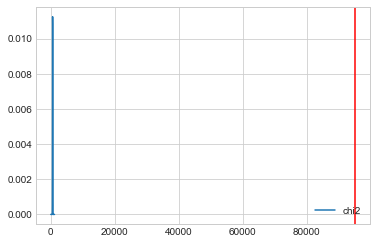

In [24]:
var=variance(redshift)
cov=covariance(redshift,distance)
slope=cov/var
const=distance.mean()-slope*redshift.mean()
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,slope,const))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(xvals,yvals)
plt.show()
#Now to compute the uncertainty
residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    residuals = np.append(residuals,pResid/distance_err[i0])
    #residuals = np.append(residuals,pResid**2)
#This time we are going to look at a histogram of the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
normalpoints=stats.norm.rvs(0,1,1000)
#First lets look at the moments 
print_moments(residuals,"residuals")
print_moments(normalpoints,"normal distribution")

#Now lets plot it
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now lets look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Lets plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

In [25]:
#We are not going to plot the fit first, lets just use our barrage of statistics to check if its ok
def hubble(z,Om):
    pVal=Om*(1+z)**3+(1.-Om)
    return np.sqrt(pVal)

def lumidistance(x,h0,Om):
    integral=0
    nint=100
    for i0 in range(nint):
        pVal=1./(1e-5+hubble(x*float(i0)/100.,Om))
        integral += pVal*x/float(nint)
    d=(1.+x)*integral*(1e6*3e5/h0)
    return d

def loglike(x):
    lTot=0
    for i0 in range(len(redshift)):
        xtest=lumidistance(redshift[i0],x[0],x[1])
        #lTot = lTot+(distance[i0]-xtest)**2
        lTot = lTot+((1./distance_err[i0])**2)*(distance[i0]-xtest)**2
    return lTot #*0.5 The above is 2 times loglike

def residuals(x):
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=lumidistance(redshift[i0],sol.x[0],sol.x[1])-distance[i0]
        residuals = np.append(residuals,pResid/distance_err[i0])
    return residuals

x0 = np.array([60.,0.2])
ps = [x0]
bnds = ((0, 1000), (0, 1.0))
#sol=opt.minimize(loglike, x0, method='Nelder-Mead',bounds=bnds, tol=1e-6)
sol=opt.minimize(loglike, x0,bounds=bnds, tol=1e-6)
print(sol)
residuals=residuals(sol.x)
print_moments(residuals,"residuals")
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

      fun: 539.9052666576513
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00060254, -0.00754881])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 7
   status: 0
  success: True
        x: array([70.42271422,  0.30137182])
residuals mean: -0.09679285130407232
residuals var: 0.9215022933461722
residuals skew: 0.0671173185046271
residuals kurtosis: 2.6690200801680217
Total chi2: 539.9052666576517 NDOF 578
Normalized chi2: 0.9340921568471483
Probability of chi2: 0.8699851775027905


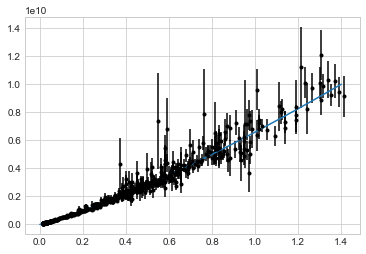

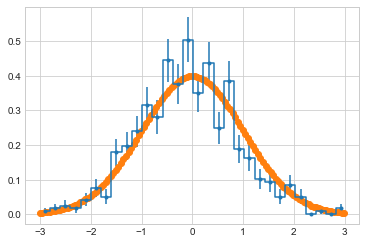

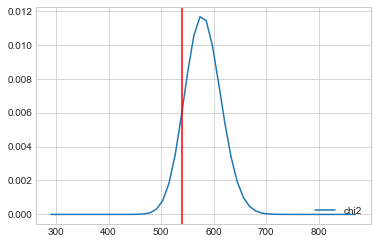

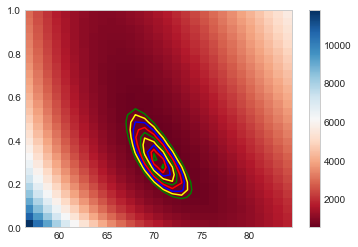

Unc matrix: [[0.34834314        nan]
 [       nan 0.02041623]]
h0 70.42271422382339 +/- 0.34834313996094823
Om: 0.3013718184298757 +/- 0.020416231610485856


/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [26]:
#Plot it against the data
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(lumidistance(pX,sol.x[0],sol.x[1]))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(xvals,yvals)
plt.show()

#Histogram the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
plt.plot(k,normal,'o-')
plt.show()

x = np.linspace(len(residuals)*0.5,len(residuals)*1.5)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

#Now lets scan the parameters
x = np.linspace(sol.x[0]*0.8,sol.x[0]*1.2, 30)
y = np.linspace(0.,1.0, 30)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([loglike([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Finally lets get our 1D unctainies from the Hessian
unc=np.sqrt(2*sol.hess_inv.matmat(np.eye(2)))
print("Unc matrix:",unc)
print("h0",sol.x[0],"+/-",unc[0,0])
print("Om:",sol.x[1],"+/-",unc[1,1])

#And lets get the correlations
import numpy.linalg as la
w, v=la.eig(2*sol.hess_inv)
print("values",w,"vectors",v)
#Now lets get the correlation C(a,b) (see below)
print("c(a,b)",v[0,1]/v[0,0])


2838664324.9011874
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 580
    # variables        = 2
    chi-square         = 539.905267
    reduced chi-square = 0.93409216
    Akaike info crit   = -37.5479587
    Bayesian info crit = -28.8219025
[[Variables]]
    h0:  70.4227272 +/- 0.33557774 (0.48%) (init = 70)
    Om:  0.30137216 +/- 0.01982395 (6.58%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(h0, Om) = -0.741


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

<Figure size 432x288 with 0 Axes>

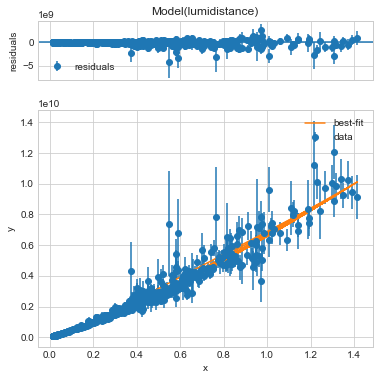

In [27]:
#Now we do it all in one fell swoop!
weights=np.array([])
for pVal in distance_err:
    weights = np.append(weights,1./pVal)

print(lumidistance(0.5,70,0.3))
model  = lmfit.Model(lumidistance)
p = model.make_params(h0=70,Om=0.2)
result = model.fit(data=distance, params=p, x=redshift, weights=weights)
lmfit.report_fit(result)
plt.figure()
result.plot()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 580
    # variables        = 3
    chi-square         = 539.699855
    reduced chi-square = 0.93535504
    Akaike info crit   = -35.7686662
    Bayesian info crit = -22.6795819
[[Variables]]
    h0:   70.5560318 +/- 0.43865457 (0.62%) (init = 70)
    Om:   0.40101405 +/- 0.21085789 (52.58%) (init = 0.2)
    OmL:  0.78991024 +/- 0.19273686 (24.40%) (init = 0.8)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om, OmL) =  0.980
    C(h0, OmL) =  0.693
    C(h0, Om)  =  0.579


<Figure size 432x288 with 0 Axes>

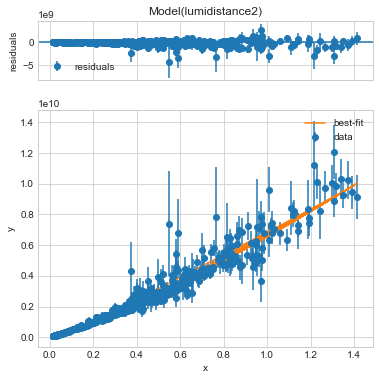

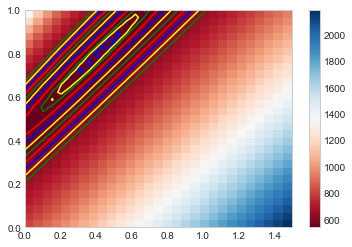

In [28]:
#And finally lets actually float both the matter and dark energy
def hubble2(z,Om,OmL):
    pVal=Om*(1+z)**3+OmL+(1-OmL-Om)*(1+z)**2
    return np.sqrt(pVal)

def lumidistance2(x,h0,Om,OmL):
    integral=0
    nint=100
    for i0 in range(nint):
        pVal=1./(1e-5+hubble2(x*float(i0)/100.,Om,OmL))
        integral += pVal*x/float(nint)
    d=(1.+x)*integral*(1e6*3e5/h0)
    return d

def loglike2(x):
    lTot=0
    for i0 in range(len(redshift)):
        xtest=lumidistance2(redshift[i0],x[0],x[1],x[2])
        #lTot = lTot+(distance[i0]-xtest)**2
        lTot = lTot+((1./distance_err[i0])**2)*(distance[i0]-xtest)**2
    return lTot #*0.5 The above is 2 times loglike


model  = lmfit.Model(lumidistance2)
p = model.make_params(h0=70,Om=0.2,OmL=0.8)
result = model.fit(data=distance, params=p, x=redshift, weights=weights)
lmfit.report_fit(result)
plt.figure()
result.plot()

#result.params["a"].value,result.params["b"].value
#Now lets scan the parameters
x = np.linspace(0,1.5,30)
y = np.linspace(0,1,30)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+loglike2([result.params["h0"],result.params["Om"],result.params["OmL"]])
Z = np.array([loglike2([result.params["h0"],x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()